<a href="https://colab.research.google.com/github/aalr007/iayaa-Equipo-19/blob/main/MNA_IAyAA_semana_7_Actividad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 7**
###**Red Neuronal Artificial - Perceptrón Multicapa : Multilayer Perceptrón (MLP)**


**Nombres y matrículas de los integrantes del equipo:**

* Aurelio Antonio Lozano Rabago A01081266
* Josias Ruiz Peña A00968460
* David González A01794025
* Jerson David Pérez Contreras A01793810
* Jose Alberto Mtanous Treviño A00169781


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [121]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import os
import numpy as np
import pandas as pd
import seaborn as sns 

from sklearn.model_selection import train_test_split 

from sklearn.metrics import confusion_matrix,classification_report, make_scorer

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.dummy import DummyRegressor

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import  cross_validate,  RepeatedStratifiedKFold

from sklearn.pipeline import make_pipeline


#**Ejercicio-1.** 

In [122]:
# Cargamos el archivo que está en la siguiente carpeta de Google-Colab:
DIR = "/content/sample_data/"
os.chdir(DIR)

miDF = pd.read_csv("dataset_Facebook.csv", sep=";")
miDF.describe()

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
count,500.000000,500.000000,500.000000,500.000000,500.000000,499.000000,500.00000,5.000000e+02,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.00000,499.000000,496.000000,500.000000
mean,123194.176000,1.880000,7.038000,4.150000,7.840000,0.278557,13903.36000,2.958595e+04,920.344000,798.772000,1415.130000,1.676638e+04,6585.488000,609.986000,7.48200,177.945892,27.266129,212.120000
std,16272.813214,0.852675,3.307936,2.030701,4.368589,0.448739,22740.78789,7.680325e+04,985.016636,882.505013,2000.594118,5.979102e+04,7682.009405,612.725618,21.18091,323.398742,42.613292,380.233118
min,81370.000000,1.000000,1.000000,1.000000,1.000000,0.000000,238.00000,5.700000e+02,9.000000,9.000000,9.000000,5.670000e+02,236.000000,9.000000,0.00000,0.000000,0.000000,0.000000
25%,112676.000000,1.000000,4.000000,2.000000,3.000000,0.000000,3315.00000,5.694750e+03,393.750000,332.500000,509.250000,3.969750e+03,2181.500000,291.000000,1.00000,56.500000,10.000000,71.000000
50%,129600.000000,2.000000,7.000000,4.000000,9.000000,0.000000,5281.00000,9.051000e+03,625.500000,551.500000,851.000000,6.255500e+03,3417.000000,412.000000,3.00000,101.000000,19.000000,123.500000
75%,136393.000000,3.000000,10.000000,6.000000,11.000000,1.000000,13168.00000,2.208550e+04,1062.000000,955.500000,1463.000000,1.486050e+04,7989.000000,656.250000,7.00000,187.500000,32.250000,228.500000
max,139441.000000,3.000000,12.000000,7.000000,23.000000,1.000000,180480.00000,1.110282e+06,11452.000000,11328.000000,19779.000000,1.107833e+06,51456.000000,4376.000000,372.00000,5172.000000,790.000000,6334.000000


In [123]:
#renombramos las columnas
miDF.rename(columns={
    'Page total likes': 'PageTotalLikes',
    'Post Month': 'PostMonth',
    'Post Hour': 'PostHour',
    'Post Weekday': 'PostWeekday',
    'Lifetime People who have liked your Page and engaged with your post':'LPE',
},inplace=True)
miDF.head()

,PageTotalLikes,Type,Category,PostMonth,PostWeekday,PostHour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,LPE,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [124]:
miDF.describe()

,PageTotalLikes,Category,PostMonth,PostWeekday,PostHour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,LPE,comment,like,share,Total Interactions
count,500.000000,500.000000,500.000000,500.000000,500.000000,499.000000,500.00000,5.000000e+02,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.00000,499.000000,496.000000,500.000000
mean,123194.176000,1.880000,7.038000,4.150000,7.840000,0.278557,13903.36000,2.958595e+04,920.344000,798.772000,1415.130000,1.676638e+04,6585.488000,609.986000,7.48200,177.945892,27.266129,212.120000
std,16272.813214,0.852675,3.307936,2.030701,4.368589,0.448739,22740.78789,7.680325e+04,985.016636,882.505013,2000.594118,5.979102e+04,7682.009405,612.725618,21.18091,323.398742,42.613292,380.233118
min,81370.000000,1.000000,1.000000,1.000000,1.000000,0.000000,238.00000,5.700000e+02,9.000000,9.000000,9.000000,5.670000e+02,236.000000,9.000000,0.00000,0.000000,0.000000,0.000000
25%,112676.000000,1.000000,4.000000,2.000000,3.000000,0.000000,3315.00000,5.694750e+03,393.750000,332.500000,509.250000,3.969750e+03,2181.500000,291.000000,1.00000,56.500000,10.000000,71.000000
50%,129600.000000,2.000000,7.000000,4.000000,9.000000,0.000000,5281.00000,9.051000e+03,625.500000,551.500000,851.000000,6.255500e+03,3417.000000,412.000000,3.00000,101.000000,19.000000,123.500000
75%,136393.000000,3.000000,10.000000,6.000000,11.000000,1.000000,13168.00000,2.208550e+04,1062.000000,955.500000,1463.000000,1.486050e+04,7989.000000,656.250000,7.00000,187.500000,32.250000,228.500000
max,139441.000000,3.000000,12.000000,7.000000,23.000000,1.000000,180480.00000,1.110282e+06,11452.000000,11328.000000,19779.000000,1.107833e+06,51456.000000,4376.000000,372.00000,5172.000000,790.000000,6334.000000


Convertimos Type a numerico

In [125]:
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(miDF['Type'])
 
# printing label
label

array([1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1,
       0, 1, 2, 2, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 0, 1, 0,
       1, 0, 2, 0, 1, 0, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 2, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 2, 1, 0, 2, 2, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [126]:
miDF2=miDF
miDF2['Type']=label
miDF2.head()


,PageTotalLikes,Type,Category,PostMonth,PostWeekday,PostHour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,LPE,comment,like,share,Total Interactions
0,139441,1,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,2,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,1,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,1,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,1,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [149]:
miDF2.dropna(subset=['Paid'],inplace = True)

#**Ejercicio-2.**

In [150]:
X = miDF2.loc[:,["Category","PageTotalLikes","Type","PostMonth","PostHour","PostWeekday","Paid"]]
y = miDF2.loc[:,'LPE']

#Realiza una partición de los datos en el conjunto de entrenamiento del 80% y el de prueba de 15%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=10)

In [151]:
X_train.describe()

,Category,PageTotalLikes,Type,PostMonth,PostHour,PostWeekday,Paid
count,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000
mean,1.874687,123013.807018,1.065163,7.010025,7.761905,4.110276,0.273183
std,0.859084,16233.796752,0.432086,3.329463,4.287525,2.029399,0.446153
min,1.000000,81370.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,111620.000000,1.000000,4.000000,3.000000,2.000000,0.000000
50%,2.000000,129600.000000,1.000000,7.000000,9.000000,4.000000,0.000000
75%,3.000000,136393.000000,1.000000,10.000000,11.000000,6.000000,1.000000
max,3.000000,139441.000000,3.000000,12.000000,20.000000,7.000000,1.000000


#**Ejercicio-3.**

In [153]:
# Incluye aquí las líneas de código que definan a la función: mi_RMSE:
def mi_RMSE(yreal, ypred):
  RMSE_val=np.square(yreal-ypred)
  RMSE_val=(np.mean(RMSE_val))**.5
  return RMSE_val


# Incluye aquí las líneas de código que definan a la función: mi_MAE:
def mi_MAE(yreal, ypred):
  MAE_val=np.abs(yreal-ypred)
  MAE_val=np.mean(MAE_val)
  return MAE_val
  

# Incluye aquí las líneas de código que definan a la función: mi_MAPE:
def mi_MAPE(yreal, ypred):
  MAPE_val = np.abs(((yreal-ypred)/yreal))
  MAPE_val=100*np.mean(MAPE_val)
  return MAPE_val

#**Ejercicio-4.**

In [154]:
df_CategoricalVar = ['Type','Category']
df_CuantitativaVar= ["PageTotalLikes"]
df_OrdinalcVar= ["PostMonth","PostHour","PostWeekday"]
df_BinaryVar= ["Paid"]

#pipeline variables Ordinales
df_PipelineOrd= Pipeline(steps = [('ImpMediana', SimpleImputer(strategy='median')), ('scalar', MinMaxScaler(feature_range=(0,1)))])
columnas_PipelineOrd =df_OrdinalcVar

#pipeline variables categoricas
df_PipelineCate = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')),('OneHotE', OneHotEncoder(handle_unknown="ignore"))])
columnas_df_PipelineCate = df_CategoricalVar


#pipeline variables binarias
df_PipelineBin = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')),('OneHotE', OneHotEncoder(handle_unknown="ignore"))])
columnas_df_PipelineBin = df_BinaryVar

#pipeline variables Cuantitativas
df_PipelineCuant = Pipeline(steps = [('impMediana', SimpleImputer(strategy='median')), ('scalar', MinMaxScaler(feature_range=(0,1)))])
columnas_df_PipelineCuant = df_CuantitativaVar= ["PageTotalLikes"]

In [155]:
df_ColTransformadas = ColumnTransformer(transformers=[('Numericas', df_PipelineOrd, columnas_PipelineOrd), 
                                            ('Categoricas', df_PipelineCate , columnas_df_PipelineCate),
                                             ('Cuantitativas', df_PipelineCuant , columnas_df_PipelineCuant),
                                            ('binarias', df_PipelineBin, columnas_df_PipelineBin)],
                                            remainder='passthrough')

#**Ejercicio-5.**

In [169]:
  mis_metricas = {
      "RMSE": make_scorer(mi_RMSE),
      "MAE":make_scorer(mi_MAE),
      "MAPE": make_scorer(mi_MAPE)
  }


DummyX_train, DummyX_test, Dummyy_train, Dummyy_test = train_test_split(X_train,y_train, test_size=0.25, random_state=0)



In [174]:
dummy_regr = DummyRegressor()
dummy_regr.fit(DummyX_train, Dummyy_train,)


DummyRegressor()


In [ ]:
for i in range(len(modelos)):

#Kfold validacion cruzada de 5 particiones y 3 repeticiones
  kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
#en pipeline ponemos las columnas transformadas y los modelos
  pipeline = Pipeline(steps=[('ct',df_ColTransformadas),('m',modelos[i])])
 
  resultadosOU = cross_validate(pipeline, X_train, y_train, scoring=mis_metricas, cv=kfold, return_train_score=True)
  
  resultados.append(resultadosOU)
  
  print("Prueba \n") 
  print('%s:\nmean RMSE: %.3f (%.4f)\nmean MAE: %.3f (%.4f)\nmean MAPE: %.3f (%.4f)\n' % (nombres[i],
                                                                          np.mean(resultadosOU['test_RMSE']), np.std(resultadosOU['test_RMSE']), 
                                                                          np.mean(resultadosOU['test_MAE']),np.std(resultadosOU['test_MAE']), 
                                                                          np.mean(resultadosOU['test_MAPE']),np.std(resultadosOU['test_MAPE'])
                                                                          ))
  

  print("Entrenamiento \n") 
  print('%s:\nmean RMSE: %.3f (%.4f)\nmean MAE: %.3f (%.4f)\nmean MAPE: %.3f (%.4f)\n' % (nombres[i],
                                                                          np.mean(resultadosOU['train_RMSE']), np.std(resultadosOU['train_RMSE']), 
                                                                          np.mean(resultadosOU['train_MAE']),np.std(resultadosOU['train_MAE']), 
                                                                          np.mean(resultadosOU['train_MAPE']),np.std(resultadosOU['train_MAPE'])))

#**Ejercicio-6.**

In [158]:
#creamos la lista de modelos con sus nombres
def Do_models():
  #listas
  modelos = list()
  nombres = list()

  # Modelo de Regresión Linear:
  modelos.append(LinearRegression())
  nombres.append('RegresionLin')

  # Modelo de arbol de Decision:
  modelos.append(MLPRegressor())
  nombres.append('Perceptron')
  
  #modelo bosque aleatorio
  modelos.append(RandomForestRegressor())
  nombres.append('BosqueAleatorio')
  
  return modelos, nombres


resultados = list()

In [159]:
#creamos los modelos
modelos, nombres = Do_models()  
modelos

[LinearRegression(), MLPRegressor(), RandomForestRegressor()]

In [160]:
print(X_train)

     Category  PageTotalLikes  Type  PostMonth  PostHour  PostWeekday  Paid
305         3          124940     1          6         2            4   0.0
107         2          136736     2         10         4            1   0.0
350         2          116435     1          5         9            5   0.0
334         2          119198     2          5         2            1   0.0
142         2          136013     2         10         2            3   1.0
..        ...             ...   ...        ...       ...          ...   ...
320         1          123047     1          6        11            3   0.0
15          2          138414     2         12        10            3   0.0
484         3           86491     1          1         7            2   0.0
125         1          136393     1         10         5            7   0.0
265         3          128032     1          7        13            6   1.0

[399 rows x 7 columns]


In [161]:
for i in range(len(modelos)):

#Kfold validacion cruzada de 5 particiones y 3 repeticiones
  kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
#en pipeline ponemos las columnas transformadas y los modelos
  pipeline = Pipeline(steps=[('ct',df_ColTransformadas),('m',modelos[i])])
 
  resultadosOU = cross_validate(pipeline, X_train, y_train, scoring=mis_metricas, cv=kfold, return_train_score=True)
  
  resultados.append(resultadosOU)
  
  print("Prueba \n") 
  print('%s:\nmean RMSE: %.3f (%.4f)\nmean MAE: %.3f (%.4f)\nmean MAPE: %.3f (%.4f)\n' % (nombres[i],
                                                                          np.mean(resultadosOU['test_RMSE']), np.std(resultadosOU['test_RMSE']), 
                                                                          np.mean(resultadosOU['test_MAE']),np.std(resultadosOU['test_MAE']), 
                                                                          np.mean(resultadosOU['test_MAPE']),np.std(resultadosOU['test_MAPE'])
                                                                          ))
  

  print("Entrenamiento \n") 
  print('%s:\nmean RMSE: %.3f (%.4f)\nmean MAE: %.3f (%.4f)\nmean MAPE: %.3f (%.4f)\n' % (nombres[i],
                                                                          np.mean(resultadosOU['train_RMSE']), np.std(resultadosOU['train_RMSE']), 
                                                                          np.mean(resultadosOU['train_MAE']),np.std(resultadosOU['train_MAE']), 
                                                                          np.mean(resultadosOU['train_MAPE']),np.std(resultadosOU['train_MAPE'])))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


Prueba 

RegresionLin:
mean RMSE: 501.452 (58.4800)
mean MAE: 305.031 (32.5787)
mean MAPE: 97.998 (45.9638)

Entrenamiento 

RegresionLin:
mean RMSE: 477.763 (15.2254)
mean MAE: 288.279 (15.7105)
mean MAPE: 93.903 (11.6521)



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: 

Prueba 

Perceptron:
mean RMSE: 749.700 (77.7148)
mean MAE: 468.227 (48.2038)
mean MAPE: 70.939 (10.4251)

Entrenamiento 

Perceptron:
mean RMSE: 753.127 (21.2517)
mean MAE: 467.799 (13.9744)
mean MAPE: 70.192 (3.4089)



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


Prueba 

BosqueAleatorio:
mean RMSE: 540.530 (66.6527)
mean MAE: 335.787 (41.4579)
mean MAPE: 108.406 (59.8300)

Entrenamiento 

BosqueAleatorio:
mean RMSE: 206.185 (10.8082)
mean MAE: 123.441 (6.8251)
mean MAPE: 37.833 (3.7797)



In [162]:
print(resultados)

[{'fit_time': array([0.02945995, 0.0226469 , 0.02889514, 0.02613473, 0.02366543,
       0.02365422, 0.02982473, 0.02118206, 0.02300334, 0.0319283 ,
       0.02177882, 0.03006744, 0.02170634, 0.02118921, 0.02505326]), 'score_time': array([0.01260972, 0.01120305, 0.01551104, 0.01424503, 0.01109099,
       0.01358795, 0.01172018, 0.01166463, 0.01057935, 0.0162971 ,
       0.01170063, 0.01362371, 0.01192832, 0.01315117, 0.0123198 ]), 'test_RMSE': array([462.18609618, 441.65397551, 550.72668191, 448.43721571,
       600.20437949, 464.98184709, 433.69137932, 556.38614291,
       470.27898635, 598.67459093, 465.43889966, 433.87410883,
       556.16926558, 485.51734281, 553.56329988]), 'train_RMSE': array([485.60273442, 491.87165739, 465.97931705, 487.83805777,
       451.57128575, 485.11760804, 494.33952327, 464.9832739 ,
       500.80559553, 453.30318221, 484.79659791, 493.09249948,
       465.10784095, 479.18080732, 462.85458911]), 'test_MAE': array([283.6375    , 276.36835337, 310.4007513 

#**Ejercicio-7.**

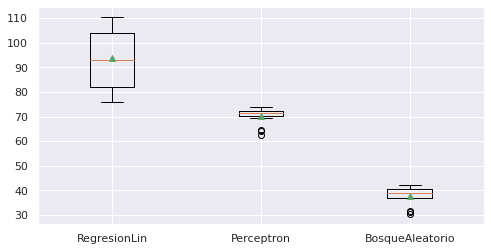

In [163]:
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(8,4)})

bpRecallTrain = list()

for i in range(len(resultados)):
  rr = resultados[i]['train_MAPE']
  bpRecallTrain.append(rr)

plt.boxplot(bpRecallTrain, labels=nombres, showmeans=True)
plt.show()

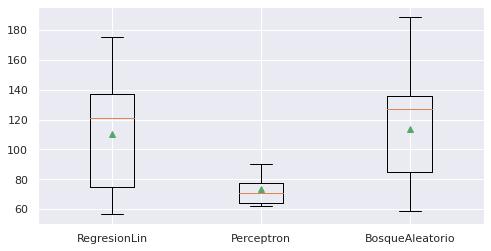

In [140]:

sns.set(rc={'figure.figsize':(8,4)})

bpRecallTest = list()

for i in range(len(resultados)):
  rr = resultados[i]['test_MAPE']
  bpRecallTest.append(rr)

plt.boxplot(bpRecallTest, labels=nombres, showmeans=True)
plt.show()

#**Ejercicio-8.**

Usando una búsqueda de malla con validación cruzada (GridSearchCV), busca los mejores 
hiperparámetros para el modelo MLP. Al menos deberás realizar la búsqueda en los 
hiperparámetros “hidden_layer_sizes”, “alpha” y “learning_rate_init”. Además aplica la validación 
cruzada con repeticiones (RepeatedKFold). Muestra los mejores hiperparámetros encontrados. 

In [147]:
mi_pipeCV = Pipeline(steps=[("DataPrep", df_ColTransformadas),("model", modelo_MLP)])
print(mi_pipeCV)

Pipeline(steps=[('DataPrep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Numericas',
                                                  Pipeline(steps=[('ImpMediana',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scalar',
                                                                   MinMaxScaler())]),
                                                  ['PostMonth', 'PostHour',
                                                   'PostWeekday']),
                                                 ('Categoricas',
                                                  Pipeline(steps=[('impModa',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('OneHotE',
                            

In [164]:
#modelo_MLP = MLPRegressor(hidden_layer_sizes=(i,), 
modelo_MLP = MLPRegressor(hidden_layer_sizes=(1, 1),     # número de capas ocultas y nodos en cada capa.
                            max_iter=20000,                # máximo número de iteraciones para el proceso de convergencia.
                            alpha=0.0001,                  # constante asociado al término de regularización L2.
                            solver='adam',                 # técnica de optimización.
                            learning_rate_init=0.001       # valor inicial del tamaño de paso con relación a "adam" o "sgd".
                            )  

modelo_MLP.fit(X_train, y_train)

mi_pipeCV = Pipeline(steps=[("DataPrep", df_ColTransformadas),("model", modelo_MLP)]) 
mi_kfoldCV = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)  

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [166]:


ParamsGR = [{'hidden_layer_sizes': ['2,1'], 'alpha': [ '.0001'], 'learning_rate_init':['001']},
                  {'hidden_layer_sizes': ['1,2'], 'alpha': [ '00005'], 'learning_rate_init':['0005']},
                  {'hidden_layer_sizes': ['2,2'], 'alpha': [ '00001'], 'learning_rate_init':['0001']},
                 ]

In [168]:
mi_Grid=  GridSearchCV (estimator =  mi_pipeCV, 
                            param_grid = ParamsGR,
                            scoring = 'MAPE',
                            cv = mi_kfoldCV)

NameError: ignored

In [ ]:
mi_Grid.fit(X_train, np.ravel(y_train))
best_score = mi_Grid.best_score_
best_param = mi_Grid.best_params_

In [ ]:
print("Best score:", best_score)
print("Best param:", best_param)

#**Ejercicio-9.**

In [ ]:
None

#**Ejercicio-10.**

In [ ]:
None

#**Ejercicio-11.**

In [ ]:
None

#**Ejercicio-12.**

In [ ]:
None

###**Fin de la Actividad de la semana 7.**